**2. zadatak (8 poena)**
<br>

Skup *fashion MNIST* sadrži sličice odevnih predmeta. Potrebno je napraviti klasifikator koji za zadatu sliku odevnog predmeta određuje kojoj kategoriji pripada.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

In [3]:
from keras.datasets import fashion_mnist

from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Lambda
from keras.utils import to_categorical
from keras import backend as K

Using TensorFlow backend.


a) Korišćenjem Keras biblioteke napraviti konvolutivnu neuronsku mrežu koja odgovara prikazu na slici.
<img src='mreza_arhitektura.png'>
Kod konvolutivnih slojeva, zbog ocuvanja dimenzija matrica, koristiti *padding* argument sa vrednoscu *same*. 

In [103]:
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

In [12]:
img_rows = 28
img_cols = 28
channels = 1
n_classes = 10

In [13]:
# softmax aktivacija - molim Vas da pozovete za dodatna pojasnjenja
# model.add(Lambda(lambda x: K.tf.nn.softmax(x)))

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
__________

b) Pročitati podatke koji se nalaze u skupu *fashion_mnist* Keras kolekcije, a zatim preduzeti sve neophodne pripremne korake.  
<br>
**Napomena:** ukoliko ova kolicina podataka bude uticala na brzinu rada racunara, izdvojiti 12000 slika za treniranje i 2000 slika za testiranje. 

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [52]:
data = fashion_mnist.load_data()

In [53]:
fashion_mnist.load_data?

Signature: fashion_mnist.load_data()
Docstring:
Loads the Fashion-MNIST dataset.

# Returns
    Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
File:      /usr/lib/python3.7/site-packages/keras/datasets/fashion_mnist.py
Type:      function


In [54]:
(x_train, y_train), (x_test, y_test) = data

In [55]:
x_train.shape

(60000, 28, 28)

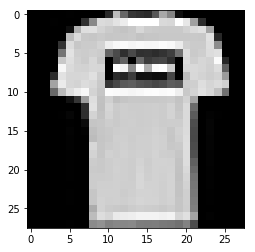

In [56]:
plt.imshow(x_train[1], cmap='gray')

Potrebno je da dodamo broj kanala kao dimenziju u podatke.

([array([25.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([22.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  1.]),
  array([21.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  3.,  0.]),
  array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  0.]),
  array([20.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  5.,  0.]),
  array([19.,  1.,  0.,  0.,  0.,  0.,  1.,  3.,  4.,  0.]),
  array([19.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  5.,  0.]),
  array([18.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  3.,  2.]),
  array([18.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  4.,  2.]),
  array([17.,  1.,  1.,  0.,  0.,  0.,  0.,  3.,  5.,  1.]),
  array([17.,  0.,  1.,  0.,  0.,  1.,  0.,  4.,  4.,  1.]),
  array([17.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  8.,  1.]),
  array([14.,  1.,  1.,  1.,  0.,  0.,  0.,  3.,  5.,  3.]),
  array([10.,  0.,  1.,  1.,  0.,  0.,  1.,  4.,  8.,  3.]),
  array([ 7.,  1.,  1.,  0.,  1.,  1.,  1.,  3., 10.,  3.]),
  array([7., 0., 1., 0., 0., 1., 0., 5., 9., 5.]),
  array([ 6.,  0.,  1.,  0.,  2., 

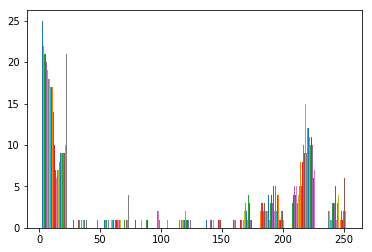

In [57]:
plt.hist(x_train[0])

Primecujemo da su vrednosti piksela u intervalu 0, 255. Normalizujemo ih...

In [58]:
x_train = x_train / 255.0
x_test = x_test / 255.0

([array([25.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([22.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  1.]),
  array([21.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  3.,  0.]),
  array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  0.]),
  array([20.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  5.,  0.]),
  array([19.,  1.,  0.,  0.,  0.,  0.,  1.,  3.,  4.,  0.]),
  array([19.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  5.,  0.]),
  array([18.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  3.,  2.]),
  array([18.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  4.,  2.]),
  array([17.,  1.,  1.,  0.,  0.,  0.,  0.,  3.,  5.,  1.]),
  array([17.,  0.,  1.,  0.,  0.,  1.,  0.,  4.,  4.,  1.]),
  array([17.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  8.,  1.]),
  array([14.,  1.,  1.,  1.,  0.,  0.,  0.,  3.,  5.,  3.]),
  array([10.,  0.,  1.,  1.,  0.,  0.,  1.,  4.,  8.,  3.]),
  array([ 7.,  1.,  1.,  0.,  1.,  1.,  1.,  3., 10.,  3.]),
  array([7., 0., 1., 0., 0., 1., 0., 5., 9., 5.]),
  array([ 6.,  0.,  1.,  0.,  2., 

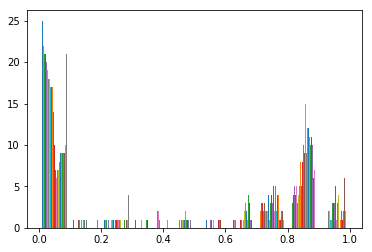

In [59]:
plt.hist(x_train[0])

In [60]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [61]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Enkodiramo labele.

In [64]:
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

In [65]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


c) Nacrtati grafik zavisnosti tačnosti klasifikatora na skupovima za treniranje i validaciju u odnosu na broj epoha. U toku treniranja mreže koristiti 20 procenata polaznog skupa za validaciju, pakete veličine 64, a za broj epoha uzeti 10.  

In [66]:
epochs = 10
batch_size = 64
validation_ratio = 0.2

**VAZNO**
Usled nedostatka graficke karte na ispitu, vrsicemo ovde odsecanje podataka
za obucavanje.

In [69]:
x_train = x_train[:1000]
y_train = y_train[:1000]

In [70]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_ratio)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 0.3809 - acc: 0.8675 - val_loss: 0.3712 - val_acc: 0.8650
Epoch 2/10
800/800 [==============================] - 3s 3ms/step - loss: 0.3159 - acc: 0.8962 - val_loss: 0.3509 - val_acc: 0.8700
Epoch 3/10
800/800 [==============================] - 3s 3ms/step - loss: 0.2495 - acc: 0.9175 - val_loss: 0.3995 - val_acc: 0.8500
Epoch 4/10
800/800 [==============================] - 2s 3ms/step - loss: 0.2188 - acc: 0.9263 - val_loss: 0.3581 - val_acc: 0.8750
Epoch 5/10
800/800 [==============================] - 3s 3ms/step - loss: 0.1867 - acc: 0.9462 - val_loss: 0.3875 - val_acc: 0.8500
Epoch 6/10
800/800 [==============================] - 2s 3ms/step - loss: 0.1519 - acc: 0.9513 - val_loss: 0.3742 - val_acc: 0.8650
Epoch 7/10
800/800 [==============================] - 3s 3ms/step - loss: 0.1440 - acc: 0.9587 - val_loss: 0.3970 - val_acc: 0.8600
Epoch 8/10
800/800 [==========

Text(0,0.5,'Acc')

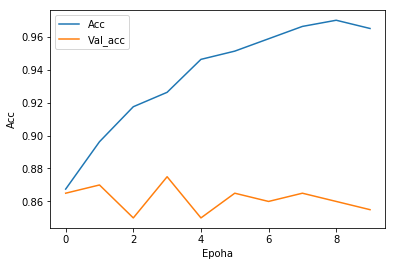

In [73]:
plt.plot(range(epochs), history.history['acc'])
plt.plot(range(epochs), history.history['val_acc'])
plt.legend(['Acc', 'Val_acc'])
plt.xlabel('Epoha')
plt.ylabel('Acc')

d) Kako se menja tačnost mreže kada se nakon svakog agregacionog sloja doda *dropout* sloj sa verovatnoćom isključivanja neurona 0.25? Nacrtati grafik zavisnosti tačnosti klasifikatora na skupovima za treniranje i validaciju u odnosu na broj epoha.

In [74]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [76]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_ratio)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 3s 4ms/step - loss: 2.0381 - acc: 0.3038 - val_loss: 1.3423 - val_acc: 0.5450
Epoch 2/10
800/800 [==============================] - 3s 3ms/step - loss: 1.1597 - acc: 0.5913 - val_loss: 0.8594 - val_acc: 0.6850
Epoch 3/10
800/800 [==============================] - 3s 3ms/step - loss: 0.9022 - acc: 0.6713 - val_loss: 0.8811 - val_acc: 0.6800
Epoch 4/10
800/800 [==============================] - 3s 3ms/step - loss: 0.7725 - acc: 0.7488 - val_loss: 0.6808 - val_acc: 0.7600
Epoch 5/10
800/800 [==============================] - 3s 3ms/step - loss: 0.7132 - acc: 0.7437 - val_loss: 0.7533 - val_acc: 0.7250
Epoch 6/10
800/800 [==============================] - 3s 3ms/step - loss: 0.6871 - acc: 0.7450 - val_loss: 0.6885 - val_acc: 0.7650
Epoch 7/10
800/800 [==============================] - 3s 3ms/step - loss: 0.6821 - acc: 0.7638 - val_loss: 0.6424 - val_acc: 0.7600
Epoch 8/10
800/800 [==========

Text(0,0.5,'Acc')

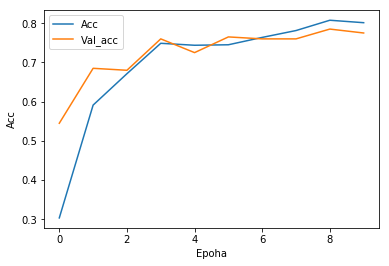

In [77]:
plt.plot(range(epochs), history.history['acc'])
plt.plot(range(epochs), history.history['val_acc'])
plt.legend(['Acc', 'Val_acc'])
plt.xlabel('Epoha')
plt.ylabel('Acc')

e) Za koju klasu odevnih predmeta se mreža najgore ponaša?

In [79]:
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

In [81]:
print(y_train_predicted.shape)
print(y_train.shape)

(1000, 10)
(1000, 10)


In [92]:
def decode_dummies(y_vector):
    return np.argmax(y_vector, axis=1)

In [95]:
y_train_predicted_nums = decode_dummies(y_train_predicted)
y_test_predicted_nums = decode_dummies(y_test_predicted)
y_train_real_nums = decode_dummies(y_train)
y_test_real_nums = decode_dummies(y_test)

In [96]:
print(y_train_predicted_nums.shape)
print(y_test_predicted_nums.shape)
print(y_train_real_nums.shape)
print(y_test_real_nums.shape)

(1000,)
(10000,)
(1000,)
(10000,)


In [98]:
train_con_mat = metrics.confusion_matrix(y_train_real_nums, y_train_predicted_nums)
test_con_mat = metrics.confusion_matrix(y_test_real_nums, y_test_predicted_nums)

In [102]:
print(train_con_mat)

[[ 84   0   1   7   0   0  14   0   1   0]
 [  0  97   0   5   0   0   2   0   0   0]
 [  0   0  35   1  12   0  38   0   0   0]
 [  2   0   0  82   1   0   7   0   0   0]
 [  0   0   3   7  74   1  10   0   0   0]
 [  0   0   0   0   0  76   0  18   0   6]
 [ 11   0   4   7   4   0  72   0   1   1]
 [  0   0   0   0   0   1   0 104   0  10]
 [  0   1   0   2   0   1   4   0  94   0]
 [  0   0   0   0   0   1   0   2   0  96]]


In [ ]:
print(metrics.confusion_matrix(y_train, y_train_predicted))

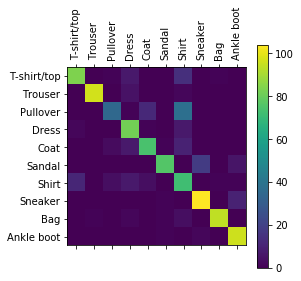

In [111]:
plt.matshow(train_con_mat)
plt.xticks(range(n_classes), class_names.values(), rotation=90)
plt.yticks(range(n_classes), class_names.values())
plt.colorbar()

In [113]:
print(metrics.confusion_matrix(y_test_predicted_nums, y_test_predicted_nums))

[[ 866    0    0    0    0    0    0    0    0    0]
 [   0  937    0    0    0    0    0    0    0    0]
 [   0    0  403    0    0    0    0    0    0    0]
 [   0    0    0 1105    0    0    0    0    0    0]
 [   0    0    0    0 1060    0    0    0    0    0]
 [   0    0    0    0    0  743    0    0    0    0]
 [   0    0    0    0    0    0 1667    0    0    0]
 [   0    0    0    0    0    0    0 1129    0    0]
 [   0    0    0    0    0    0    0    0  955    0]
 [   0    0    0    0    0    0    0    0    0 1135]]


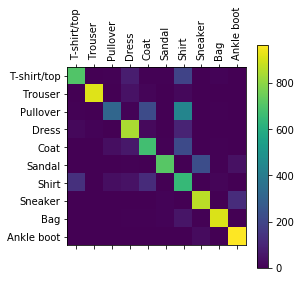

In [114]:
plt.matshow(test_con_mat)
plt.xticks(range(n_classes), class_names.values(), rotation=90)
plt.yticks(range(n_classes), class_names.values())
plt.colorbar()

Zakljucujemo da je mreza najvise gresila kod klasa `Pullover` i `Shirt`. Pogledajmo kako one izgledaju.

In [128]:
shirts_from_test_idx = np.where(y_test_real_nums == 6)
print(shirts_from_test_idx[0][0])

pullovers_from_test_idx = np.where(y_test_real_nums == 2)

4


In [126]:
some_shirt = x_test[shirts_from_test_idx[0][0]]
print(some_shirt.shape)

(28, 28, 1)


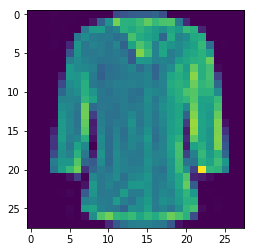

In [127]:
plt.imshow(some_shirt.squeeze())

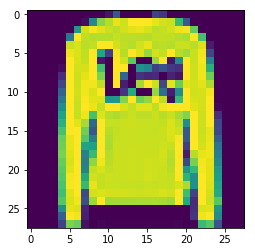

In [129]:
some_pullover = x_test[pullovers_from_test_idx[0][0]]
plt.imshow(some_pullover.squeeze())

Klase izuzetno lice medjusobno, te je i ocekivano da ih mreza mesa.

f) Sačuvati konfiguraciju mreže u datoteci sa imenom *fashion_mnist*.

In [132]:
model_config = model.get_config()

In [133]:
import json

In [135]:
with open('fashion_mnist_config.json', 'w') as fp:
    json.dump(model_config, fp)